### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load Dataset

In [2]:
df = pd.read_csv('../data/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Understanding Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

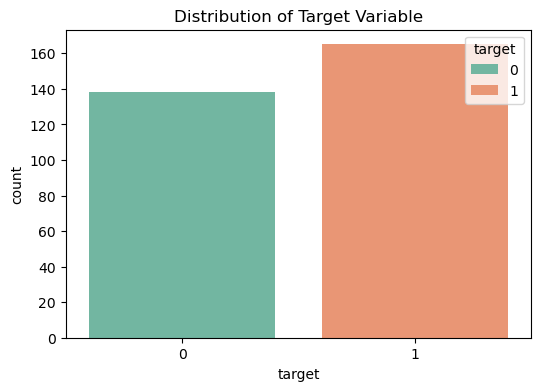

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', palette='Set2', hue="target")
plt.title('Distribution of Target Variable')
plt.show()

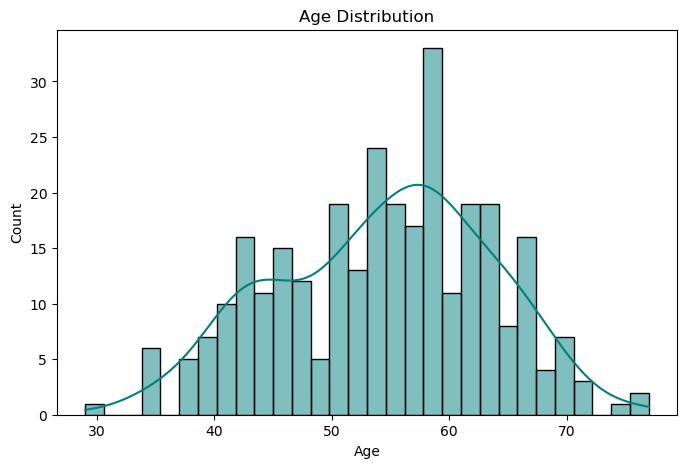

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, bins=30, color='teal')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

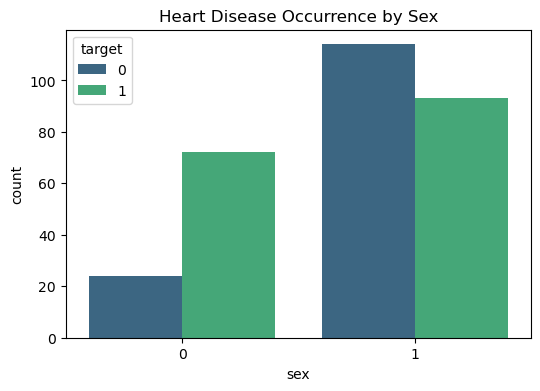

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sex', hue='target', palette='viridis')
plt.title('Heart Disease Occurrence by Sex')
plt.show()

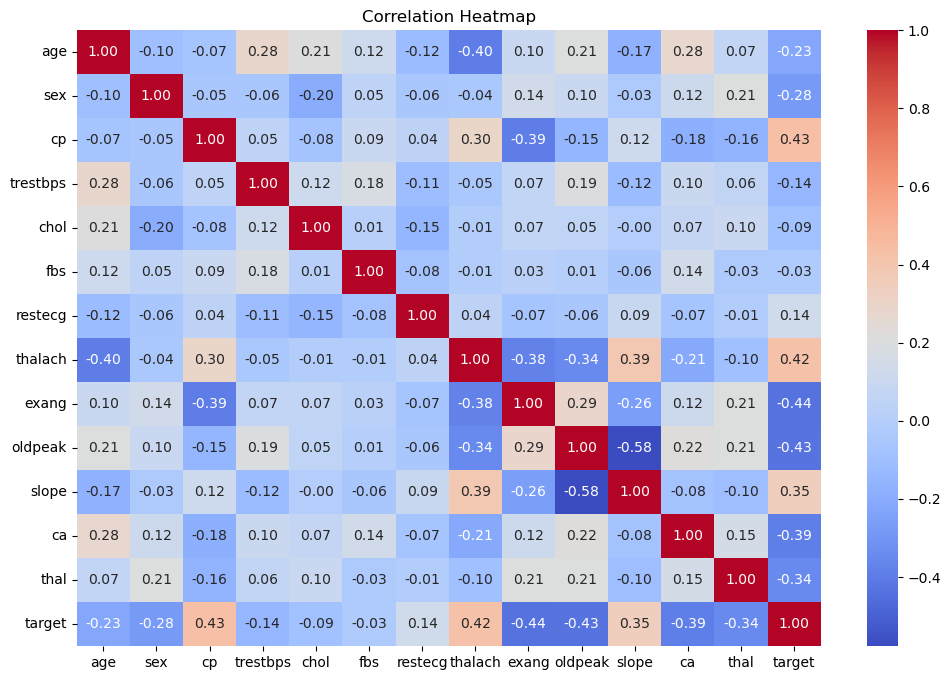

In [10]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

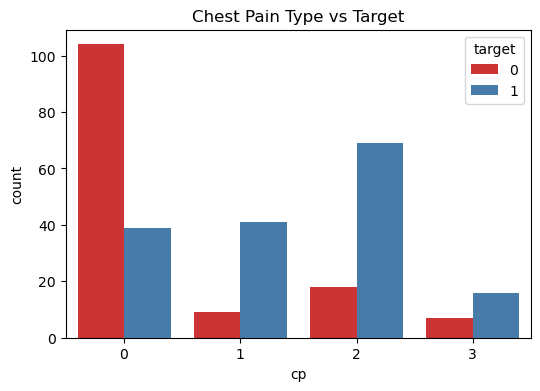

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='cp', hue='target', palette='Set1')
plt.title('Chest Pain Type vs Target')
plt.show()

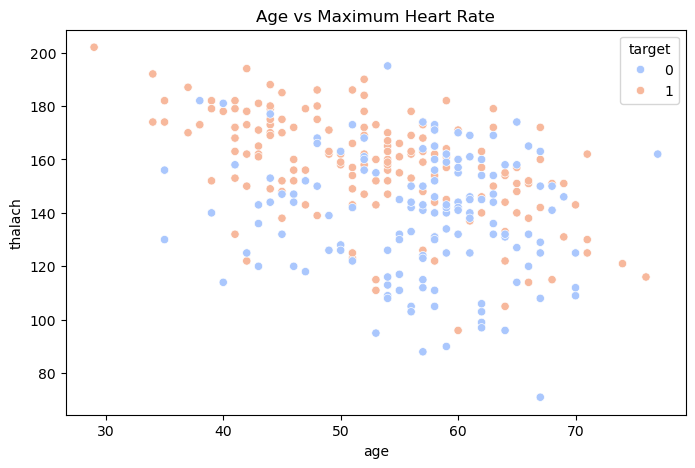

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='thalach', hue='target', palette='coolwarm')
plt.title('Age vs Maximum Heart Rate')
plt.show()

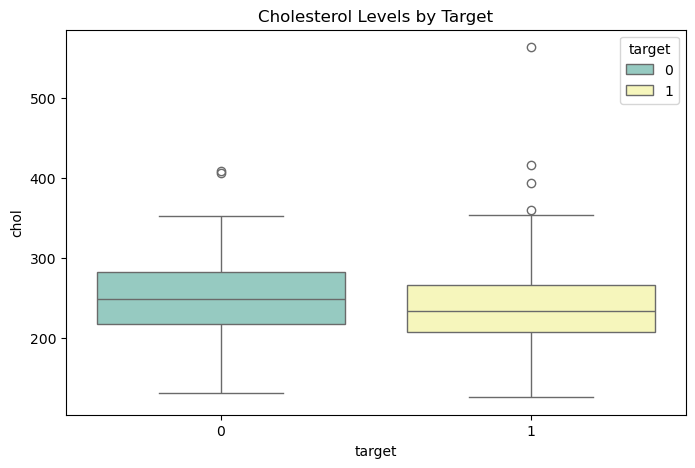

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='target', y='chol', palette='Set3', hue="target")
plt.title('Cholesterol Levels by Target')
plt.show()

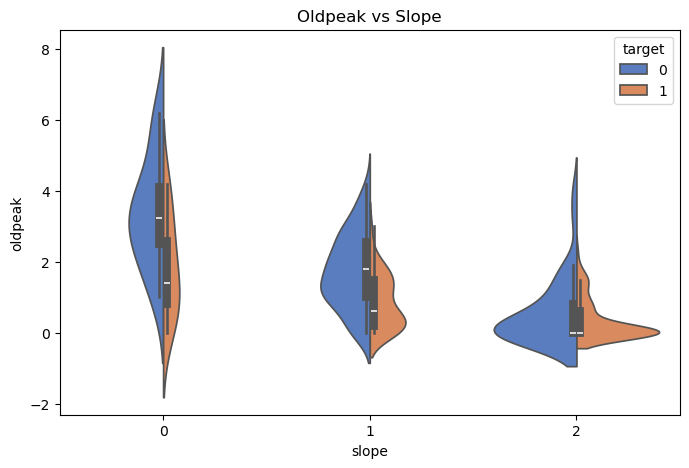

In [14]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='slope', y='oldpeak', hue='target', split=True, palette='muted')
plt.title('Oldpeak vs Slope')
plt.show()

### Split Features and Target

In [15]:
X = df.drop(labels="target", axis=1)

In [16]:
y = df['target']

### Split Train and Test Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=71)

### Building Model

In [18]:
base_model = RandomForestClassifier()

In [19]:
params = {
    'n_estimators':       [1, 2, 3, 5], 
    'max_depth':          [None, 2, 3, 4, 5], 
    'min_samples_split':  [2, 5, 10],
    'min_samples_leaf':   [1, 2, 4],     
    'max_features':       ['sqrt', 'log2', None], 
    'bootstrap':          [True, False],
    'criterion':          ['gini', 'entropy'],
    'class_weight':       [None, 'balanced']
}

In [20]:
grid_search = GridSearchCV(estimator=base_model, param_grid=params, n_jobs=-1, scoring='accuracy', cv=5, verbose=0)

In [21]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [1, 2, 3, 5]},
             scoring='accuracy')

In [22]:
grid_search.best_params_

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 5}

In [23]:
grid_search.best_score_

0.8639455782312926

### Building Final Model

In [24]:
model = RandomForestClassifier(n_estimators=5, criterion="entropy", max_depth=None, 
                               max_features="log2", min_samples_leaf=2, min_samples_split=10, 
                               bootstrap=True, class_weight="balanced")

In [25]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=5)

In [26]:
pred = model.predict(X_test)

### Model Evaluation

In [27]:
accuracy_score(y_true=y_test, y_pred=pred)

0.7213114754098361

In [28]:
print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70        27
           1       0.77      0.71      0.74        34

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61

